# Handwritten Digit Recognition
- Author = Amitrajit Bose
- Dataset = MNIST
- [Medium Article Link](https://medium.com/@amitrajit_bose/handwritten-digit-mnist-pytorch-977b5338e627)
- Frameworks = PyTorch

ADJUSTMENTS MADE BY THE USER ARE MARKED BY #MN

### Necessary Imports

In [ ]:
# Import necessary packages
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')   #MN

Mounted at /content/gdrive


### Download The Dataset & Define The Transforms

In [ ]:
### Run this cell

from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST('gdrive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform) #MN
valset = datasets.MNIST('gdrive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)  #MN
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)


Extracting gdrive/My Drive/mnist/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to gdrive/My Drive/mnist/MNIST_data/MNIST/raw




Extracting gdrive/My Drive/mnist/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to gdrive/My Drive/mnist/MNIST_data/MNIST/raw




Extracting gdrive/My Drive/mnist/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to gdrive/My Drive/mnist/MNIST_data/MNIST/raw




Extracting gdrive/My Drive/mnist/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to gdrive/My Drive/mnist/MNIST_data/MNIST/raw

Processing...
Done!


### Exploring The Data

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


In [ ]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

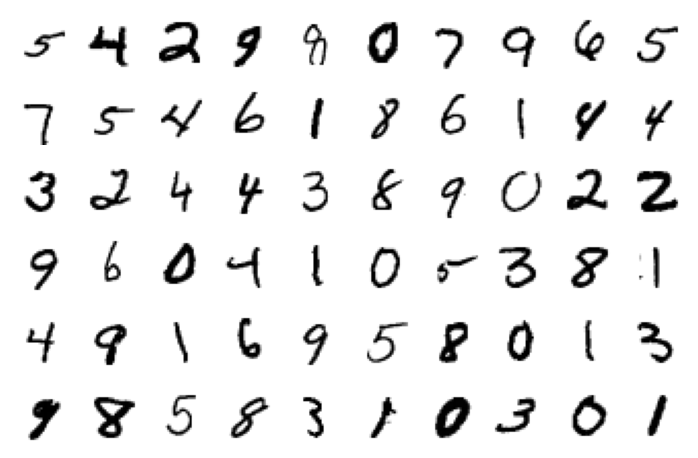

In [ ]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

### Defining The Neural Network

![](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/image/mlp_mnist.png)

In [ ]:
from torch import nn

# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)

In [ ]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images.cuda())
loss = criterion(logps, labels.cuda())

In [ ]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0032,  0.0032,  0.0032,  ...,  0.0032,  0.0032,  0.0032],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        ...,
        [-0.0006, -0.0006, -0.0006,  ..., -0.0006, -0.0006, -0.0006],
        [-0.0016, -0.0016, -0.0016,  ..., -0.0016, -0.0016, -0.0016],
        [-0.0040, -0.0040, -0.0040,  ..., -0.0040, -0.0040, -0.0040]],
       device='cuda:0')


In [ ]:
from torch import optim

# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [ ]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images.cuda())
loss = criterion(output, labels.cuda())
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-2.8644e-02,  1.1864e-02, -7.9719e-03,  ..., -5.0313e-03,
          1.4215e-02,  2.7175e-02],
        [-5.7191e-05, -1.9193e-02,  8.4893e-03,  ..., -9.8921e-03,
         -2.0156e-02,  2.6881e-02],
        [-1.3645e-02,  2.2948e-02, -2.0644e-02,  ..., -3.4433e-02,
         -4.7020e-03,  2.5970e-02],
        ...,
        [-2.9135e-02,  2.8807e-02, -1.2573e-02,  ..., -2.8008e-02,
         -3.7163e-03, -1.4209e-02],
        [-1.6934e-02,  1.7792e-02, -1.5549e-03,  ..., -1.1947e-03,
          3.1046e-02,  1.4108e-02],
        [-3.1810e-02, -2.5622e-02, -1.0568e-02,  ..., -3.1576e-02,
          1.2274e-02,  1.6817e-02]], device='cuda:0', requires_grad=True)
Gradient - tensor([[-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [ 0.0023,  0.0023,  0.0023,  ...,  0.0023,  0.0023,  0.0023],
        [-0.0039, -0.0039, -0.0039,  ..., -0.0039, -0.0039, -0.0039],
        ...,
        [-0.0026, -0.0026, -0.0026,  ..., -0.0026, -0.00

In [ ]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-2.8639e-02,  1.1868e-02, -7.9674e-03,  ..., -5.0268e-03,
          1.4220e-02,  2.7179e-02],
        [-7.9713e-05, -1.9215e-02,  8.4668e-03,  ..., -9.9146e-03,
         -2.0178e-02,  2.6858e-02],
        [-1.3606e-02,  2.2987e-02, -2.0605e-02,  ..., -3.4394e-02,
         -4.6629e-03,  2.6009e-02],
        ...,
        [-2.9109e-02,  2.8833e-02, -1.2547e-02,  ..., -2.7982e-02,
         -3.6905e-03, -1.4184e-02],
        [-1.6956e-02,  1.7770e-02, -1.5769e-03,  ..., -1.2167e-03,
          3.1024e-02,  1.4085e-02],
        [-3.1822e-02, -2.5633e-02, -1.0580e-02,  ..., -3.1587e-02,
          1.2263e-02,  1.6805e-02]], device='cuda:0', requires_grad=True)


### Core Training Of Neural Network

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images.cuda())
        loss = criterion(output, labels.cuda())
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 0.6368652802349916
Epoch 1 - Training loss: 0.2834696386223917
Epoch 2 - Training loss: 0.21942142338783882
Epoch 3 - Training loss: 0.17649335104789435
Epoch 4 - Training loss: 0.14930097137623505
Epoch 5 - Training loss: 0.12841480501345606
Epoch 6 - Training loss: 0.11267998746570462
Epoch 7 - Training loss: 0.10016747595750287
Epoch 8 - Training loss: 0.09039115765269028
Epoch 9 - Training loss: 0.08135816420831565
Epoch 10 - Training loss: 0.07366120011986557
Epoch 11 - Training loss: 0.06771604096078113
Epoch 12 - Training loss: 0.06156954793522615
Epoch 13 - Training loss: 0.058283108081777835
Epoch 14 - Training loss: 0.05264818007603034

Training Time (in minutes) = 2.0372299194335937


In [ ]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 2


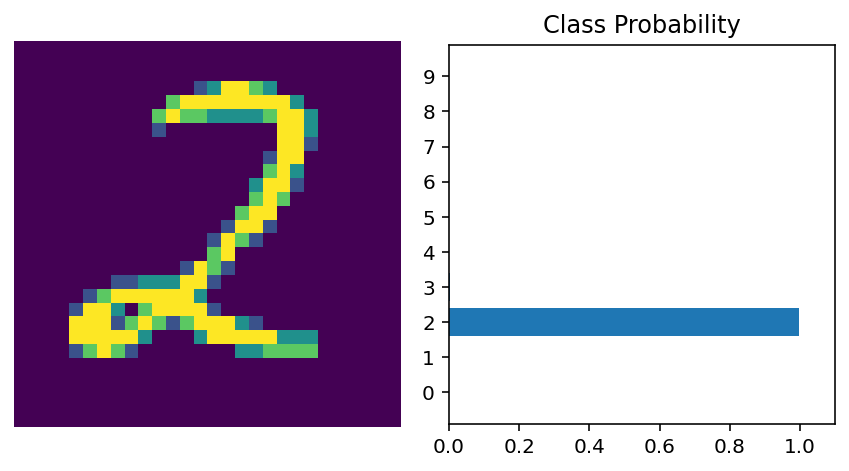

In [ ]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img.cuda())

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.cpu().numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

### Model Evaluation

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img.cuda())

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.cpu().numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9727
